# Date-a-Scientist

## Portfolio project

First import the necessary modules:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Now, time to load the data and look at its basic information

In [2]:
data = pd.read_csv('profiles.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

There are 31 features in this data, I don't think they are all important to analisys.

In [3]:
data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


### Data cleanup

I don't think the essay columns are of much relevance to this project, so, I will drop them from the dataset:

In [4]:
data.drop(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],\
          axis=1, inplace=True)

Dropping the 'ethnicity' column as many values do not make sense:

In [5]:
data.drop(['ethnicity'], axis=1, inplace=True)

The 'income' column also has alot of -1 values and this data does not help much as such, dropping also.

In [6]:
data.drop(['income'], axis=1, inplace=True)

The 'last_online' feature is also not usefull, so is the Zodiac sign as it has no predictive power.

In [7]:
data.drop(['last_online', 'sign'], axis=1, inplace=True)

The location data also isn't relevant for the models I want to buid, so is the languages spoken:

In [8]:
data.drop(['location', 'speaks'],axis=1, inplace=True)

There is also a problem with the number of NaN values, I will drop all the rows with such values:

In [9]:
data.dropna(inplace=True)
data.shape

(8022, 15)

That still leaves me with 8020 valid rows, perhaps I can use these to make good models

##### Age

In [10]:
data['age'].describe()

count    8022.000000
mean       33.732486
std        11.098352
min        18.000000
25%        26.000000
50%        30.000000
75%        40.000000
max        69.000000
Name: age, dtype: float64

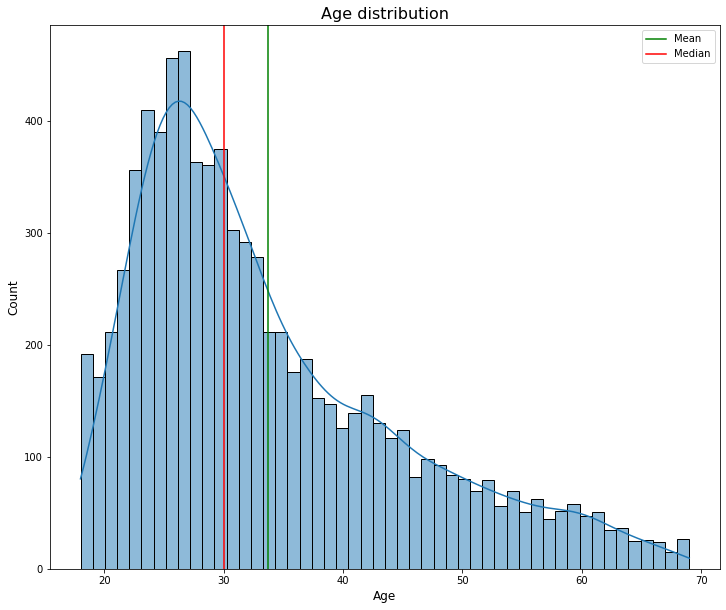

In [11]:
plt.figure(figsize=(12,10))
sns.histplot(data=data, x='age', bins=50, kde=True)
plt.axvline(data.age.mean(), color='g', label='Mean')
plt.axvline(data.age.median(), color='r', label='Median')
plt.title('Age distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.show()

The data is right skewed, but the distriution seems rather normal.

##### Body type

In [12]:
data.body_type.value_counts()

average           2201
fit               1688
athletic          1531
curvy              739
thin               660
a little extra     549
skinny             227
full figured       181
overweight          97
jacked              64
used up             63
rather not say      22
Name: body_type, dtype: int64

In [13]:
data.body_type = pd.Categorical(data.body_type)

##### diet

I will also convert this to categorical data.

In [14]:
data.diet.value_counts()

mostly anything        4045
anything               1128
strictly anything      1061
mostly vegetarian       806
mostly other            264
strictly vegetarian     232
strictly other          112
vegetarian               87
other                    72
mostly vegan             71
strictly vegan           57
mostly kosher            30
vegan                    30
mostly halal             15
strictly kosher           6
strictly halal            4
kosher                    2
Name: diet, dtype: int64

In [15]:
data.diet = pd.Categorical(data.diet)

##### Drinks

This, I will do the same.

In [16]:
data.drinks.value_counts()

socially       5481
rarely         1007
often           718
not at all      650
very often      105
desperately      61
Name: drinks, dtype: int64

In [17]:
data.drinks = pd.Categorical(data.drinks)

##### Drugs

In [18]:
data.drugs.value_counts()

never        6392
sometimes    1524
often         106
Name: drugs, dtype: int64

In [19]:
data.drugs = pd.Categorical(data.drugs)

##### Education

In [20]:
data.education.value_counts()

graduated from college/university    3254
graduated from masters program       1306
working on college/university         951
graduated from two-year college       328
graduated from high school            307
working on two-year college           236
working on masters program            220
dropped out of college/university     218
graduated from ph.d program           196
graduated from law school             164
working on ph.d program               129
graduated from space camp             116
dropped out of space camp             105
college/university                     82
working on space camp                  77
graduated from med school              66
dropped out of two-year college        42
working on law school                  35
dropped out of masters program         32
dropped out of high school             29
working on med school                  27
two-year college                       26
dropped out of ph.d program            25
working on high school            

In [21]:
data.education = pd.Categorical(data.education)

##### Height

In [22]:
data.height.describe()

count    8022.000000
mean       68.158689
std         4.002664
min        36.000000
25%        65.000000
50%        68.000000
75%        71.000000
max        95.000000
Name: height, dtype: float64

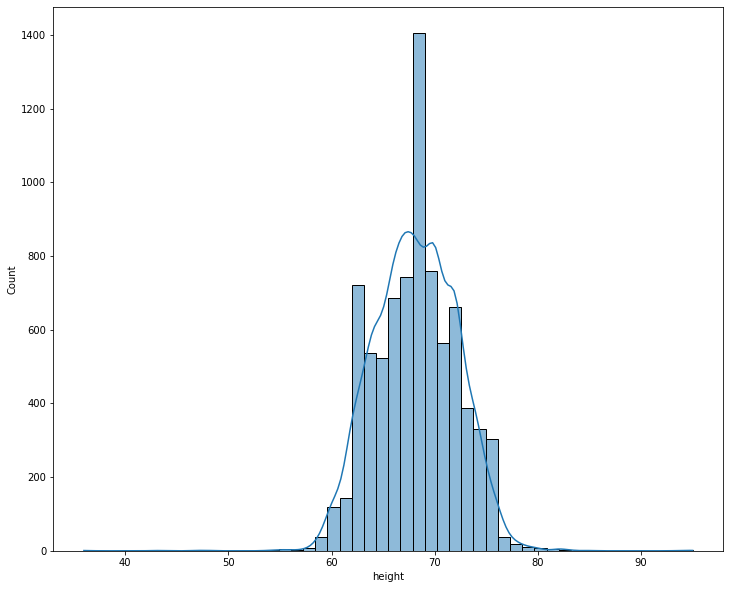

In [23]:
plt.figure(figsize=(12,10))
sns.histplot(data=data, x='height', bins=50, kde=True)
plt.show()

The data distribution is normal

##### Job

In [24]:
data.job.value_counts()

other                                1148
student                               802
computer / hardware / software        715
science / tech / engineering          710
artistic / musical / writer           683
sales / marketing / biz dev           634
medicine / health                     596
education / academia                  499
executive / management                402
entertainment / media                 314
banking / financial / real estate     308
hospitality / travel                  229
law / legal services                  201
construction / craftsmanship          182
clerical / administrative             159
political / government                112
rather not say                         80
retired                                77
transportation                         65
unemployed                             63
military                               43
Name: job, dtype: int64

In [25]:
data.job = pd.Categorical(data.job)

##### Offspring

I will remove some html artifacts present and categorize this too.

In [26]:
data.offspring = data.offspring.str.replace('doesn&rsquo;t', 'does not')

In [27]:
data.offspring.value_counts()

does not have kids                           2036
does not have kids, but might want them      1679
does not have kids, but wants them           1399
does not want kids                            811
does not have kids, and does not want any     545
has kids                                      493
has a kid                                     438
has kids, but does not want more              192
has a kid, but does not want more             122
has a kid, and might want more                 90
wants kids                                     69
might want kids                                59
has kids, and might want more                  57
has a kid, and wants more                      23
has kids, and wants more                        9
Name: offspring, dtype: int64

In [28]:
data.offspring = pd.Categorical(data.offspring)

##### Orientation

In [29]:
data.orientation.value_counts()

straight    7075
gay          498
bisexual     449
Name: orientation, dtype: int64

In [30]:
data.orientation = pd.Categorical(data.orientation)

##### Pets

In [31]:
data.pets.value_counts()

likes dogs and likes cats          3017
likes dogs                         1229
likes dogs and has cats             895
has dogs                            716
has dogs and likes cats             535
likes dogs and dislikes cats        512
has dogs and has cats               347
has cats                            234
likes cats                          194
has dogs and dislikes cats          144
dislikes dogs and likes cats         81
dislikes dogs and dislikes cats      65
dislikes dogs and has cats           21
dislikes cats                        21
dislikes dogs                        11
Name: pets, dtype: int64

In [32]:
data.pets = pd.Categorical(data.pets)

##### Religion

In [33]:
data.religion.value_counts()

agnosticism but not too serious about it      600
catholicism but not too serious about it      502
agnosticism and laughing about it             501
christianity but not too serious about it     484
atheism and laughing about it                 475
agnosticism                                   460
other                                         448
other and laughing about it                   443
other but not too serious about it            405
atheism                                       335
christianity                                  299
atheism but not too serious about it          295
judaism but not too serious about it          266
christianity and somewhat serious about it    248
atheism and somewhat serious about it         198
other and somewhat serious about it           188
atheism and very serious about it             158
catholicism and laughing about it             158
christianity and very serious about it        150
buddhism but not too serious about it         141


In [34]:
data.religion = pd.Categorical(data.religion)

##### Sex

In [35]:
data.sex.value_counts()

m    4489
f    3533
Name: sex, dtype: int64

In [36]:
data.sex = pd.Categorical(data.sex)

##### Smokes

In [37]:
data.smokes.value_counts()

no                6486
sometimes          521
when drinking      428
yes                341
trying to quit     246
Name: smokes, dtype: int64

In [38]:
data.smokes = pd.Categorical(data.smokes)

##### Status

In [39]:
data.status.value_counts()

single            7512
available          255
seeing someone     213
married             42
Name: status, dtype: int64

In [40]:
def set_status(status):
    if status in ['single', 'available']:
        return 'single'
    else:
        return 'relationship'
data.status = data.status.apply(set_status)

In [41]:
data.status.value_counts()

single          7767
relationship     255
Name: status, dtype: int64

In [42]:
data.status = pd.Categorical(data.status)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8022 entries, 0 to 59944
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          8022 non-null   int64   
 1   body_type    8022 non-null   category
 2   diet         8022 non-null   category
 3   drinks       8022 non-null   category
 4   drugs        8022 non-null   category
 5   education    8022 non-null   category
 6   height       8022 non-null   float64 
 7   job          8022 non-null   category
 8   offspring    8022 non-null   category
 9   orientation  8022 non-null   category
 10  pets         8022 non-null   category
 11  religion     8022 non-null   category
 12  sex          8022 non-null   category
 13  smokes       8022 non-null   category
 14  status       8022 non-null   category
dtypes: category(13), float64(1), int64(1)
memory usage: 554.6 KB


This finished the data cleanup, now, time to attempt to apply some ML models in this data.

## K-Nearest neighbors

In [56]:

# I will used the category codes to train the data
features = np.array([
    data.age,
    data.body_type.cat.codes,
    data.diet.cat.codes,
    data.drinks.cat.codes,
    data.drugs.cat.codes,
    data.education.cat.codes,
    data.height,
    data.job.cat.codes,
    data.offspring.cat.codes,
    data.orientation.cat.codes,
    data.pets.cat.codes,
    data.religion.cat.codes,
    data.smokes.cat.codes,
    data.status.cat.codes
])

labels = np.array(data.sex.cat.codes)

In [63]:
feature_train, feature_test, label_train, label_test = train_test_split(features.transpose(), labels, train_size = 0.1)

for n in range(3,16, 2):
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(feature_train, label_train)

    score = knn_model.score(feature_test, label_test)
    print(f'The model has a {(score * 100):.2f}% accuracy with {n} neighbors.')

The model has a 72.23% accuracy with 3 neighbors.
The model has a 73.73% accuracy with 5 neighbors.
The model has a 74.40% accuracy with 7 neighbors.
The model has a 74.85% accuracy with 9 neighbors.
The model has a 75.35% accuracy with 11 neighbors.
The model has a 75.36% accuracy with 13 neighbors.
The model has a 75.55% accuracy with 15 neighbors.
